In [ ]:
# Install nessasary librarys
!pip install scikit-learn
!pip install matplotlib


In [82]:
# Import the relevant librarys
import pandas as pd
from sklearn.preprocessing import StandardScaler
import sklearn
import kaggle

# Import zipfile library (we will use this to extract the file downloaded from Kaggle)
import zipfile


In [ ]:
# Download dataset from kaggle using the Kaggle API
!kaggle datasets download vjchoudhary7/customer-segmentation-tutorial-in-python


In [42]:
# Extract the file from the downloaded zip file
zipfile_name = "customer-segmentation-tutorial-in-python.zip"
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [ ]:
# Full path to the CSV file
file_path = r"Mall_Customers.csv"

# Load the data into a pandas DataFrame
customer_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data
print(customer_data.head())

In [83]:
# Number of rows and colums
customer_data.shape

(200, 6)

In [84]:
# See how our data looks
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [85]:
# Checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64

In [86]:
# Selecting the numerical features to scale
features_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler and transform the selected features
customer_data_scaled = customer_data.copy()
customer_data_scaled[features_to_scale] = scaler.fit_transform(customer_data[features_to_scale])

# Show the first few rows of the scaled data
print(customer_data_scaled.head())


   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male -1.424569           -1.738999               -0.434801   
1           2    Male -1.281035           -1.738999                1.195704   
2           3  Female -1.352802           -1.700830               -1.715913   
3           4  Female -1.137502           -1.700830                1.040418   
4           5  Female -0.563369           -1.662660               -0.395980   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


In [87]:
# Drop CustomerID since it's not relevant for clustering
customer_data_scaled = customer_data_scaled.drop('CustomerID', axis=1)

# Convert Gender to numerical values (optional, if you want to include it)
customer_data_scaled['Gender'] = customer_data_scaled['Gender'].map({'Male': 0, 'Female': 1})

# Display the first few rows to verify changes
print(customer_data_scaled.head())


   Gender       Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       0 -1.424569           -1.738999               -0.434801        2
1       0 -1.281035           -1.738999                1.195704        2
2       1 -1.352802           -1.700830               -1.715913        2
3       1 -1.137502           -1.700830                1.040418        2
4       1 -0.563369           -1.662660               -0.395980        2


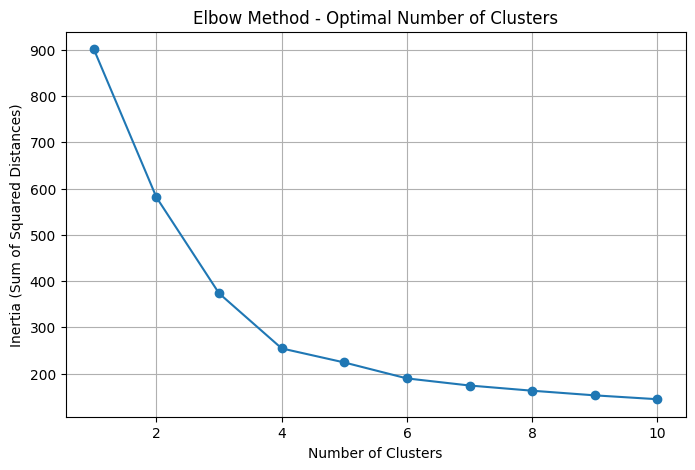

In [88]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# List to store the inertia for each number of clusters
inertia = []

# Range of cluster numbers to try
cluster_range = range(1, 11)

# Perform K-means clustering for each number of clusters and calculate the inertia
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()


In [89]:
# Run K-Means with the optimal number of clusters
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)

# Fit K-Means on the scaled data
customer_data_scaled['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Display the first few rows with the cluster assignments
print(customer_data_scaled.head())


   Gender       Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       0 -1.424569           -1.738999               -0.434801        2
1       0 -1.281035           -1.738999                1.195704        2
2       1 -1.352802           -1.700830               -1.715913        2
3       1 -1.137502           -1.700830                1.040418        2
4       1 -0.563369           -1.662660               -0.395980        2


In [90]:
# Group the data by Cluster and calculate mean for each feature
cluster_summary = customer_data_scaled.groupby('Cluster').mean()

# Display the cluster summary
print(cluster_summary)


           Gender       Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                
0        0.578125  1.080537           -0.504457               -0.379602
1        0.487179  0.073331            0.974945               -1.197297
2        0.596491 -0.962492           -0.784763                0.392030
3        0.550000 -0.428806            0.974847                1.216085


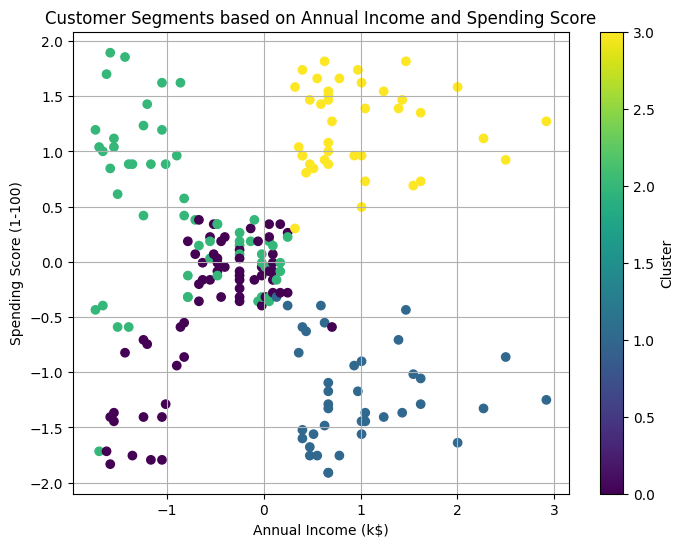

In [91]:
# Plotting clusters based on two features (e.g., Annual Income and Spending Score)
plt.figure(figsize=(8, 6))
plt.scatter(customer_data_scaled['Annual Income (k$)'], customer_data_scaled['Spending Score (1-100)'], 
            c=customer_data_scaled['Cluster'], cmap='viridis')
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3D plot based on Age, Annual Income, and Spending Score
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(customer_data_scaled['Age'], 
                     customer_data_scaled['Annual Income (k$)'], 
                     customer_data_scaled['Spending Score (1-100)'], 
                     c=customer_data_scaled['Cluster'], cmap='viridis')

ax.set_title('Customer Segments in 3D')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
fig.colorbar(scatter, ax=ax, label='Cluster')
plt.show()


In [92]:
# Assuming kmeans is your fitted KMeans model
customer_data['Cluster'] = kmeans.labels_

# Check the column names to ensure we use the correct names
print(customer_data.columns)
customer_data

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


In [93]:
# Check data types to identify numeric columns
print(customer_data.dtypes)

# Group by 'Cluster' and calculate the mean for only numeric columns
cluster_summary = customer_data.groupby('Cluster').mean(numeric_only=True)

# Display the summary
print(cluster_summary)


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
Cluster                    int32
dtype: object
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         68.484375  53.906250           47.343750               40.421875
1        159.743590  39.871795           86.102564               19.358974
2         53.438596  25.438596           40.000000               60.298246
3        161.025000  32.875000           86.100000               81.525000


In [ ]:
# Assign meaningful labels based on cluster characteristics
cluster_labels = {
    0: 'High Spenders',
    1: 'Low Spenders',
    2: 'Frugal High Earners',
    3: 'Young Spenders',
}

# Apply the labels
customer_data_scaled['Cluster Label'] = customer_data_scaled['Cluster'].map(cluster_labels)

# Verify the labeled clusters
print(customer_data_scaled[['Cluster', 'Cluster Label']].head())


In [94]:
# Export the data to a CSV file for dashboard creation in Tableau or Power BI
customer_data_scaled.to_csv('customer_segments.csv', index=False)
